In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

from src.dataimport import list_files, list_files_with_extension, list_files_with_extension_directory

# Dateien laden

In [3]:
# Example usage
RAW_FILES_PATH = 'data/original/brat-project-final/'
TRANSFORMED_FILES_PATH = 'data/transformed/'
list_files(TRANSFORMED_FILES_PATH)[:7]

['essay001.ann',
 'essay001.json',
 'essay002.ann',
 'essay002.json',
 'essay003.ann',
 'essay003.json',
 'essay004.ann']

In [14]:
files_directory_txt = list_files_with_extension_directory(RAW_FILES_PATH, '.txt')
files_directory_ann = list_files_with_extension_directory(RAW_FILES_PATH, '.ann')
files_directory_json = list_files_with_extension_directory(TRANSFORMED_FILES_PATH, '.json')
print(files_directory_txt)
print(files_directory_ann)
print(files_directory_json)

['data/original/brat-project-final/essay001.txt', 'data/original/brat-project-final/essay002.txt', 'data/original/brat-project-final/essay003.txt', 'data/original/brat-project-final/essay004.txt', 'data/original/brat-project-final/essay005.txt', 'data/original/brat-project-final/essay006.txt', 'data/original/brat-project-final/essay007.txt', 'data/original/brat-project-final/essay008.txt', 'data/original/brat-project-final/essay009.txt', 'data/original/brat-project-final/essay010.txt', 'data/original/brat-project-final/essay011.txt', 'data/original/brat-project-final/essay012.txt', 'data/original/brat-project-final/essay013.txt', 'data/original/brat-project-final/essay014.txt', 'data/original/brat-project-final/essay015.txt', 'data/original/brat-project-final/essay016.txt', 'data/original/brat-project-final/essay017.txt', 'data/original/brat-project-final/essay018.txt', 'data/original/brat-project-final/essay019.txt', 'data/original/brat-project-final/essay020.txt', 'data/original/brat

In [5]:
print(len(files_directory_txt))
print(len(files_directory_ann))
print(len(files_directory_json))

402
402
402


# Analyse der TXT-Datei

In [6]:
def calculate_txt_file_lengths(files_path_list):
    """
    Calculate the number of characters and words in each text file in the given directory.
    """
    file_lengths = []

    for file_path in files_path_list:
        with open(file_path, 'r') as f:
            content = f.read()
            char_count = len(content) # count characters
            word_count = len(content.split()) # count words
            file_lengths.append({'FileName': os.path.basename(file_path), 'CharCount': char_count, 'WordCount': word_count})

    df_lengths = pd.DataFrame(file_lengths)
    return df_lengths

In [7]:
txt_lengths_df = calculate_txt_file_lengths(files_directory_txt)
txt_lengths_df

,FileName,CharCount,WordCount
0,essay001.txt,2232,376
1,essay002.txt,2078,333
2,essay003.txt,1789,260
3,essay004.txt,1884,288
4,essay005.txt,1654,262
...,...,...,...
397,essay398.txt,1952,325
398,essay399.txt,1550,263
399,essay400.txt,1813,284
400,essay401.txt,1669,280


In [8]:
txt_lengths_df.describe()

,CharCount,WordCount
count,402.000000,402.000000
mean,1974.139303,327.151741
std,321.283904,56.232190
min,1243.000000,199.000000
25%,1765.500000,288.250000
50%,1939.000000,318.000000
75%,2173.750000,357.750000
max,2847.000000,504.000000


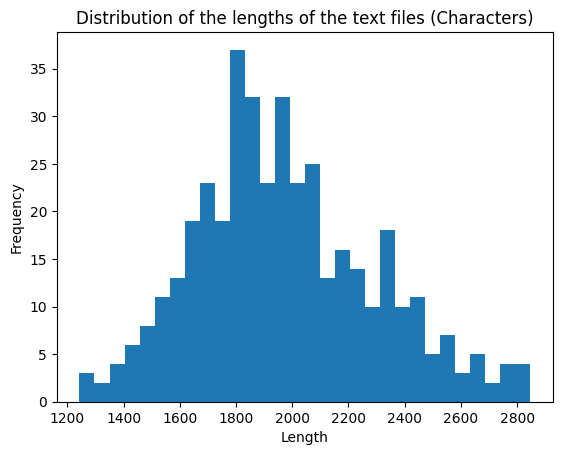

In [9]:
# distribution of the lengths of the text files
plt.hist(txt_lengths_df['CharCount'], bins=30)
plt.title('Distribution of the lengths of the text files (Characters)')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

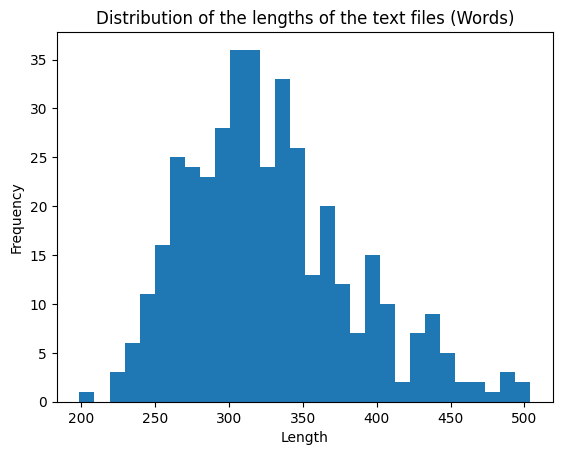

In [10]:
plt.hist(txt_lengths_df['WordCount'], bins=30)
plt.title('Distribution of the lengths of the text files (Words)')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

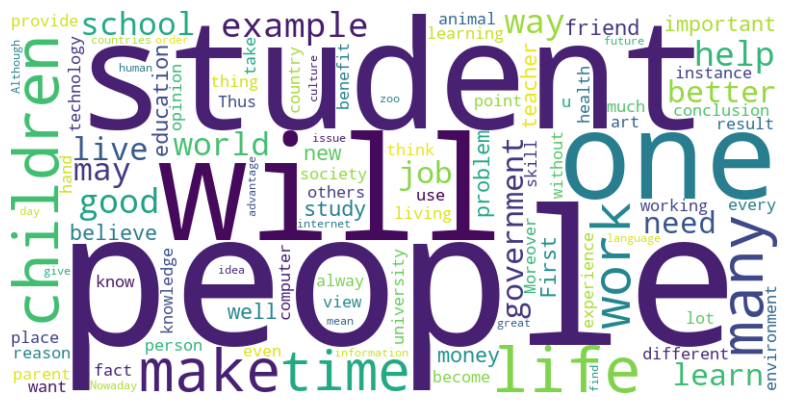

In [41]:
# Combine all text files into a single string
all_text = ''
for file_path in files_directory_txt:
    with open(file_path, 'r') as file:
        all_text += file.read() + ' '
# stopwords
stopwords = set(STOPWORDS)
# stopwords.update(['word1','word2'])

# Generate the word cloud
wordcloud = WordCloud(width=800,
                      height=400,
                      stopwords=stopwords,
                      background_color='white',
                      max_words=100, # default: 200
                      random_state=42
                      ).generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear') # bilinear interpolation to make the displayed image appear more smoothly
plt.axis('off')
#plt.title('Word Cloud for Text Files')
plt.show()

# save to file
# wordcloud.to_file('wordcloud.png')

# Quelle für Wordcloud: https://www.datacamp.com/tutorial/wordcloud-python

# Analyse der ANN-Datei

## Anzahl MajorClaims, Claims, Premissen und Beziehungen zählen

In [11]:
def count_entities(files_list):
    data = []
    for file_path in files_list:
        file_name = os.path.basename(file_path)
        majorclaims = 0
        claims = 0
        premises = 0
        stances = 0
        relation = 0
        with open(file_path, 'r') as file:
            lines = file.readlines()
            for line in lines:
                if line.startswith('T'):
                    entity = line.split('\t')[1].split(' ')[0]
                    if entity == 'MajorClaim':
                        majorclaims += 1
                    elif entity == 'Claim':
                        claims += 1
                    elif entity == 'Premise':
                        premises += 1
                elif line.startswith('A'):
                    entity = line.split('\t')[1].split(' ')[0]
                    if entity == 'Stance':
                        stances += 1
                elif line.startswith('R'):
                    relation += 1

        data.append({'FileName': file_name,
                     'MajorClaims': majorclaims,
                     'Claims': claims,
                     'Premises': premises,
                     'Stances': stances,
                     'Relations': relation,
                     'Total': majorclaims + claims + premises + stances + relation})
    
    df = pd.DataFrame(data)
    
    return df

In [16]:
# example
count_df = count_entities(files_directory_ann)

# sort the files by the number of entities
count_df = count_df.sort_values(by=['Total'], ascending=False)
count_df

,FileName,MajorClaims,Claims,Premises,Stances,Relations,Total
168,essay169.ann,2,6,20,6,20,54
160,essay161.ann,2,8,16,8,16,50
153,essay154.ann,2,6,18,6,18,50
285,essay286.ann,2,5,18,5,18,48
311,essay312.ann,2,4,19,4,19,48
...,...,...,...,...,...,...,...
102,essay103.ann,1,3,4,3,4,15
32,essay033.ann,1,3,4,3,4,15
139,essay140.ann,2,2,4,2,4,14
170,essay171.ann,2,2,4,2,4,14


# ANN-File laden

## Var1

In [44]:
def parse_brat_annotation(files_path, files_name):
    """
    Formatiert die Annotationen in einer .ann-Datei in ein Pandas DataFrame. Dazu gehören die Entitäten, Attribute und Beziehungen
    Args:
        file_path (str): Pfad zur .ann-Datei
    Returns:
        pandas.DataFrame: Ein DataFrame mit den Annotationen
    """
    entities = []
    attributes = []
    relations = []

    path = files_path + files_name

    with open(path, 'r') as file:
        lines = file.readlines()

    for line in lines: # Iteriert über alle Zeilen in der Datei
        parts = line.strip().split('\t') # Teilt eine Zeile in durch Tabulatoren getrennte Teile 
        if parts[0].startswith('T'): # Wenn Zeile mit 'T' beginnt // Claims, MajorClaims, Premises
            entity_id = parts[0]
            entity_info = parts[1].split(' ')
            entity_type = entity_info[0]
            entity_start = int(entity_info[1])
            entity_end = int(entity_info[2])
            entity_text = parts[2]
            entities.append({

                'id': entity_id,
                'type': entity_type,
                'start': entity_start,
                'end': entity_end,
                'text': entity_text
            })
        elif parts[0].startswith('A'): # Wenn Zeile mit 'A' beginnt // Attribute
            attribute_id = parts[0]
            attribute_info = parts[1].split(' ')
            attribute_type = attribute_info[0]
            target_id = attribute_info[1]
            #attribute_value = parts[2] if len(parts) > 2 else None
            attribute_value = attribute_info[2]
            attributes.append({
                'id': attribute_id,
                'type': attribute_type,
                'target': target_id,
                'value': attribute_value
            })
        elif parts[0].startswith('R'): # Wenn Zeile mit 'R' beginnt
            relation_id = parts[0]
            relation_info = parts[1].split(' ') 
            relation_type = relation_info[0]
            arg1 = relation_info[1].split(':')[1]
            arg2 = relation_info[2].split(':')[1]
            relations.append({
                'id': relation_id,
                'arg1_from': arg1,
                'type': relation_type,
                'arg2_to': arg2
            })

    for entity in entities:
        # Mit nachfolgendem Code ist kein merge notwendig
        # Add stance to entities
        # Wenn 'target' der Attribute und 'ID' der Entities übereinstimmen, dann wird 'value' aus den Attributen zu Entities als Stance hinzugefügt
        # Mit next() wird das erste Element zurückgegeben, das den Bedingungen entspricht und None, wenn kein Element gefunden wird
        entity['stance'] = next((attr['value'] for attr in attributes if attr['target'] == entity['id']), None)
        #entity['stance'] = next((attr['value'] for attr in attributes if attr['target'] == entity['id'] and attr['type'] == 'Stance'), None)

        # Add relation to claims
        # Wenn 'arg1_from' der Relations und 'ID' der Entities übereinstimmen, dann wird:
        # 1: 'type' aus den Relations zu Entities als Relation hinzugefügt
        # 2: 'arg2_to' aus den Relations zu Entities als Relation_target hinzugefügt. Das ist der claim auf der sich die Relation bezieht
        # Mit next() wird das erste Element zurückgegeben, das den Bedingungen entspricht und None, wenn kein Element gefunden wird
        entity['relation'] = next((rel['type'] for rel in relations if rel['arg1_from'] == entity['id']), None)
        entity['relation_target'] = next((rel['arg2_to'] for rel in relations if rel['arg1_from'] == entity['id']), None)
           

    # turn data into a dataframe
    entities_df = pd.DataFrame(entities)
    attributes_df = pd.DataFrame(attributes)
    relations_df = pd.DataFrame(relations)

    return entities_df, attributes_df, relations_df

In [ ]:
# Example usage
entities, attributes, relations = parse_brat_annotation(FILES_PATH, example_file)
entities

,id,type,start,end,text,stance,relation,relation_target
0,T1,MajorClaim,503,575,we should attach more importance to cooperatio...,None,None,None
1,T2,MajorClaim,2154,2231,a more cooperative attitudes towards life is m...,None,None,None
2,T3,Claim,591,714,"through cooperation, children can learn about ...",For,None,None
3,T4,Premise,716,851,What we acquired from team work is not only ho...,None,supports,T3
4,T5,Premise,853,1086,"During the process of cooperation, children ca...",None,supports,T3
5,T6,Premise,1088,1191,All of these skills help them to get on well w...,None,supports,T3
6,T7,Claim,1332,1376,competition makes the society more effective,Against,None,None
7,T8,Premise,1212,1301,the significance of competition is that how to...,None,supports,T7
8,T9,Premise,1387,1492,when we consider about the question that how t...,None,supports,T11
9,T10,Premise,1549,1846,Take Olympic games which is a form of competit...,None,supports,T11


In [ ]:
entities.sort_values('type')
entities.drop(columns=['start', 'end'], inplace=True)
entities

,id,type,text,stance,relation,relation_target
0,T1,MajorClaim,we should attach more importance to cooperatio...,None,None,None
1,T2,MajorClaim,a more cooperative attitudes towards life is m...,None,None,None
2,T3,Claim,"through cooperation, children can learn about ...",For,None,None
3,T4,Premise,What we acquired from team work is not only ho...,None,supports,T3
4,T5,Premise,"During the process of cooperation, children ca...",None,supports,T3
5,T6,Premise,All of these skills help them to get on well w...,None,supports,T3
6,T7,Claim,competition makes the society more effective,Against,None,None
7,T8,Premise,the significance of competition is that how to...,None,supports,T7
8,T9,Premise,when we consider about the question that how t...,None,supports,T11
9,T10,Premise,Take Olympic games which is a form of competit...,None,supports,T11


In [ ]:
def count_entity_types_per_file(files_path, files_list):
    entity_counts = {}

    for file in files_list:
        entities_df, _, _ = parse_brat_annotation(files_path, file)
        entity_type_counts = entities_df['type'].value_counts().to_dict()
        entity_counts[file] = entity_type_counts

    entity_counts_df = pd.DataFrame(entity_counts).T#.fillna(0)

    return entity_counts_df

# Example usage
entity_counts_df = count_entity_types_per_file(FILES_PATH, ann_files_list)
entity_counts_df

In [ ]:
entity_counts_df.describe().round(1)

In [ ]:
entity_counts_df.sort_values('MajorClaim', ascending=False)

In [ ]:
entity_counts_df.sort_values('Claim', ascending=False)

In [ ]:
entity_counts_df.sort_values('Premise', ascending=False)

In [ ]:
# plot entity counts
import matplotlib.pyplot as plt

entity_counts_df.plot(kind='bar', stacked=True, figsize=(15, 5))
plt.title('Entity counts per file')
plt.show()

In [ ]:
# entities_df für di ersten 10 Dateien
 
for file in ann_files_list[:10]:
    entities, _, _ = parse_brat_annotation(FILES_PATH, file)
    print(file)
    
    print(entities.sort_values('type'))
    print('-------------------')

## Var 2

In [45]:
def parse_brat_annotation2(files_path, files_name):
    """
    Formatiert die Annotationen in einer .ann-Datei in ein Pandas DataFrame. Dazu gehören die Entitäten, Attribute und Beziehungen
    Args:
        file_path (str): Pfad zur .ann-Datei
    Returns:
        pandas.DataFrame: Ein DataFrame mit den Annotationen
    """
    entities = []
    attributes = []
    relations = []

    path = files_path + files_name

    with open(path, 'r') as file:
        lines = file.readlines()

    for line in lines: # Iteriert über alle Zeilen in der Datei
        parts = line.strip().split('\t') # Teilt eine Zeile in durch Tabulatoren getrennte Teile 
        if parts[0].startswith('T'): # Wenn Zeile mit 'T' beginnt // Claims, MajorClaims, Premises
            entity_id = parts[0]
            entity_info = parts[1].split(' ')
            entity_type = entity_info[0]
            entity_start = int(entity_info[1])
            entity_end = int(entity_info[2])
            entity_text = parts[2]
            entities.append({

                'id': entity_id,
                'type': entity_type,
                #'start': entity_start,
                #'end': entity_end,
                'text': entity_text
            })
        elif parts[0].startswith('A'): # Wenn Zeile mit 'A' beginnt // Attribute
            attribute_id = parts[0]
            attribute_info = parts[1].split(' ')
            attribute_type = attribute_info[0]
            target_id = attribute_info[1]
            #attribute_value = parts[2] if len(parts) > 2 else None
            attribute_value = attribute_info[2]
            attributes.append({
                'id': attribute_id,
                'type': attribute_type,
                'target': target_id,
                'value': attribute_value
            })
        elif parts[0].startswith('R'): # Wenn Zeile mit 'R' beginnt
            relation_id = parts[0]
            relation_info = parts[1].split(' ') 
            relation_type = relation_info[0]
            arg1 = relation_info[1].split(':')[1]
            arg2 = relation_info[2].split(':')[1]
            relations.append({
                'id': relation_id,
                'arg1_from': arg1,
                'type': relation_type,
                'arg2_to': arg2
            })

    # turn data into a dataframe
    #entities_df = pd.DataFrame(entities)
    #attributes_df = pd.DataFrame(attributes)
    #relations_df = pd.DataFrame(relations)

    #return entities_df, attributes_df, relations_df
    return entities, attributes, relations

In [ ]:
# Example usage
entities, attributes, relations = parse_brat_annotation2(FILES_PATH, example_file)
entities

In [ ]:
attributes

In [ ]:
relations

In [ ]:
df = pd.DataFrame(entities)
df

## Var3

In [46]:
import os
import re
import pandas as pd

def parse_ann_file(filepath):
    # Initialize dictionaries to hold the different argument units and their stances
    major_claims = []
    claims = []
    premises = []

    # Dictionary to map argument unit IDs to their stance if available
    stances = {}

    with open(filepath, 'r') as file:
        for line in file:
            # Match argument units (MajorClaim, Claim, Premise)
            if line.startswith("T"):
                parts = line.strip().split("\t")
                unit_id, unit_type, text = parts[0], parts[1].split()[0], parts[2]

                # Parse each argument unit by type
                if unit_type == "MajorClaim":
                    major_claims.append({"text": text, "stance": stances.get(unit_id, None)})
                elif unit_type == "Claim":
                    claims.append({"text": text, "stance": stances.get(unit_id, None)})
                elif unit_type == "Premise":
                    premises.append({"text": text, "stance": stances.get(unit_id, None)})

            # Match stance annotations
            elif line.startswith("A"):
                stance_parts = line.strip().split("\t")
                if len(stance_parts) >= 3:
                    _, stance_type, target_id = stance_parts[0], stance_parts[1].split()[0], stance_parts[1].split()[1]
                    stance_value = stance_parts[2]

                    # Only consider stance type if it is 'Stance'
                    if stance_type == "Stance":
                        stances[target_id] = stance_value

    # Return the extracted data as dictionaries
    return {"MajorClaims": major_claims, "Claims": claims, "Premises": premises}

def process_files_in_directory(directory):
    # Initialize a list to collect data for each file
    data = []

    # Process each .ann file in the specified directory
    for filename in os.listdir(directory):
        if filename.endswith(".ann"):
            filepath = os.path.join(directory, filename)
            file_data = parse_ann_file(filepath)
            file_data["Filename"] = filename  # Include the filename for reference
            data.append(file_data)

    # Convert the list of dictionaries into a pandas DataFrame
    df = pd.DataFrame(data)

    # Convert columns with argument lists into lists of texts and stances for easier reading
    df["MajorClaims"] = df["MajorClaims"].apply(lambda lst: [(item["text"], item["stance"]) for item in lst])
    df["Claims"] = df["Claims"].apply(lambda lst: [(item["text"], item["stance"]) for item in lst])
    df["Premises"] = df["Premises"].apply(lambda lst: [(item["text"], item["stance"]) for item in lst])

    return df

# Usage
df = process_files_in_directory(FILES_PATH)

# Print or save the DataFrame as needed
df


,MajorClaims,Claims,Premises,Filename
0,[(we should attach more importance to cooperat...,"[(through cooperation, children can learn abou...",[(What we acquired from team work is not only ...,essay001.ann
1,[(they are able to sustain their cultural iden...,[(sustaining the cultural values of immigrants...,[(maintaining one’s cultural identity is a key...,essay002.ann
2,[(it has contributed to the economic developme...,[(tourism has clearly improved lives in the to...,[(international tourism promotes many aspects ...,essay003.ann
3,[(this industry has affected the cultural attr...,[(the tourism bring large profit for the desti...,[(tourists from different cultures will probab...,essay004.ann
4,[(one who studies overseas will gain many skil...,[(studying at an overseas university gives ind...,[(Compared to the peers studying in the home c...,essay005.ann
...,...,...,...,...
397,[(it is necessary for universities to respect ...,[(many different characters exist between male...,[(Most of male students tend to use their left...,essay398.ann
398,[(this is a worrying tread which has negative ...,[(This gives children the idea that it is not ...,[(The first impression of the celebrities seem...,essay399.ann
399,[(governments should devote a greater portion ...,[(society should be educated and became aware ...,[(decreasing the number of patients in the hea...,essay400.ann
400,[(fatherhood is a as vital part of a healty pa...,[(The first reason why the father's role shoul...,[(the role models within a family play a signi...,essay401.ann


In [47]:
df['MajorClaims'][0]

[('we should attach more importance to cooperation during primary education',
  None),
 ("a more cooperative attitudes towards life is more profitable in one's success",
  None)]

In [48]:
df['Claims'][0]

[('through cooperation, children can learn about interpersonal skills which are significant in the future life of all students',
  None),
 ('competition makes the society more effective', None),
 ('without the cooperation, there would be no victory of competition', None)]

In [49]:
df['Claims'][0]

[('through cooperation, children can learn about interpersonal skills which are significant in the future life of all students',
  None),
 ('competition makes the society more effective', None),
 ('without the cooperation, there would be no victory of competition', None)]

## Var4

In [ ]:
import pandas as pd
import re
import os

def parse_ann_file(file_path):
    with open(file_path, 'r') as file:
        content = file.readlines()
    
    major_claims = []
    claims = []
    premises = []
    stances = {}
    relations = []

    for line in content:
        if line.startswith('T'):
            parts = line.strip().split('\t')
            t_number = parts[0]
            annotation = parts[1].split()
            annotation_type = annotation[0]
            sentence = parts[2]

            if annotation_type == 'MajorClaim':
                major_claims.append({'id': t_number, 'Sentence': sentence})
            elif annotation_type == 'Claim':
                claims.append({'id': t_number, 'Sentence': sentence})
            elif annotation_type == 'Premise':
                premises.append({'id': t_number, 'Sentence': sentence})
        
        elif line.startswith('A'):
            parts = line.strip().split('\t')
            annotation = parts[1].split()
            t_number = annotation[1]
            stance = annotation[2]
            stances[t_number] = stance
        
        elif line.startswith('R'):
            parts = line.strip().split('\t')
            annotation = parts[1].split()
            relation_type = annotation[0]
            arg1 = annotation[1].split(':')[1]
            arg2 = annotation[2].split(':')[1]
            relations.append({'Relation': relation_type, 'Arg1': arg1, 'Arg2': arg2})

    # Add stances to claims
    for claim in claims:
        t_number = claim['id']
        claim['Stance'] = stances.get(t_number, '')

    # Add relations to premises
    for premise in premises:
        t_number = premise['id']
        related_relations = [rel for rel in relations if rel['Arg1'] == t_number]
        premise['Relations'] = [{'Relation': rel['Relation'], 'Target': rel['Arg2']} for rel in related_relations]

    return {
        'MajorClaims': major_claims,
        'Claims': claims,
        'Premises': premises,
        'Stances': stances,
        'Relations': relations
    }

def create_dataframe_from_ann_files(directory):
    data = []
    for filename in os.listdir(directory):
        if filename.endswith('.ann'):
            file_path = os.path.join(directory, filename)
            parsed_data = parse_ann_file(file_path)
            data.append({
                'file-name': filename,
                'MajorClaims': parsed_data['MajorClaims'],
                'Claims': parsed_data['Claims'],
                'Premises': parsed_data['Premises'],
                'Stances': parsed_data['Stances'],
                'Relations': parsed_data['Relations']
            })
    
    df = pd.DataFrame(data, columns=['file-name', 'MajorClaims', 'Claims', 'Premises', 'Stances', 'Relations'])
    return df

# Example usage
print(FILES_PATH)
df = create_dataframe_from_ann_files(FILES_PATH)
df

Essays/ArgumentAnnotatedEssays-2.0/brat-project-final/


,file-name,MajorClaims,Claims,Premises,Stances,Relations
0,essay001.ann,"[{'T-Number': 'T1', 'Sentence': 'we should att...","[{'T-Number': 'T3', 'Sentence': 'through coope...","[{'T-Number': 'T4', 'Sentence': 'What we acqui...","{'T3': 'For', 'T7': 'Against', 'T11': 'For'}","[{'Relation': 'supports', 'Arg1': 'T4', 'Arg2'..."
1,essay002.ann,"[{'T-Number': 'T1', 'Sentence': 'they are able...","[{'T-Number': 'T4', 'Sentence': 'sustaining th...","[{'T-Number': 'T3', 'Sentence': 'maintaining o...","{'T4': 'For', 'T10': 'For', 'T14': 'Against'}","[{'Relation': 'supports', 'Arg1': 'T9', 'Arg2'..."
2,essay003.ann,"[{'T-Number': 'T1', 'Sentence': 'it has contri...","[{'T-Number': 'T3', 'Sentence': 'tourism has c...","[{'T-Number': 'T4', 'Sentence': 'international...","{'T3': 'For', 'T8': 'For'}","[{'Relation': 'supports', 'Arg1': 'T10', 'Arg2..."
3,essay004.ann,"[{'T-Number': 'T1', 'Sentence': 'this industry...","[{'T-Number': 'T3', 'Sentence': 'the tourism b...","[{'T-Number': 'T6', 'Sentence': 'tourists from...","{'T3': 'Against', 'T4': 'For', 'T5': 'For'}","[{'Relation': 'supports', 'Arg1': 'T8', 'Arg2'..."
4,essay005.ann,"[{'T-Number': 'T1', 'Sentence': 'one who studi...","[{'T-Number': 'T3', 'Sentence': 'studying at a...","[{'T-Number': 'T6', 'Sentence': 'Compared to t...","{'T3': 'For', 'T4': 'For', 'T5': 'For', 'T12':...","[{'Relation': 'supports', 'Arg1': 'T6', 'Arg2'..."
...,...,...,...,...,...,...
397,essay398.ann,"[{'T-Number': 'T2', 'Sentence': 'it is necessa...","[{'T-Number': 'T1', 'Sentence': 'many differen...","[{'T-Number': 'T3', 'Sentence': 'Most of male ...","{'T1': 'For', 'T8': 'For', 'T10': 'For', 'T12'...","[{'Relation': 'supports', 'Arg1': 'T3', 'Arg2'..."
398,essay399.ann,"[{'T-Number': 'T1', 'Sentence': 'this is a wor...","[{'T-Number': 'T3', 'Sentence': 'This gives ch...","[{'T-Number': 'T4', 'Sentence': 'The first imp...","{'T3': 'For', 'T7': 'For', 'T9': 'For'}","[{'Relation': 'supports', 'Arg1': 'T4', 'Arg2'..."
399,essay400.ann,"[{'T-Number': 'T1', 'Sentence': 'governments s...","[{'T-Number': 'T3', 'Sentence': 'society shoul...","[{'T-Number': 'T4', 'Sentence': 'decreasing th...","{'T3': 'For', 'T10': 'For'}","[{'Relation': 'supports', 'Arg1': 'T4', 'Arg2'..."
400,essay401.ann,"[{'T-Number': 'T1', 'Sentence': 'fatherhood is...","[{'T-Number': 'T5', 'Sentence': 'The first rea...","[{'T-Number': 'T3', 'Sentence': 'the role mode...","{'T5': 'For', 'T8': 'For'}","[{'Relation': 'supports', 'Arg1': 'T3', 'Arg2'..."


In [ ]:
df["MajorClaims"][0]

[{'T-Number': 'T1',
  'Sentence': 'we should attach more importance to cooperation during primary education'},
 {'T-Number': 'T2',
  'Sentence': "a more cooperative attitudes towards life is more profitable in one's success"}]

In [7]:
df["Claims"][0]

[{'T-Number': 'T3',
  'Sentence': 'through cooperation, children can learn about interpersonal skills which are significant in the future life of all students',
  'Stance': 'For'},
 {'T-Number': 'T7',
  'Sentence': 'competition makes the society more effective',
  'Stance': 'Against'},
 {'T-Number': 'T11',
  'Sentence': 'without the cooperation, there would be no victory of competition',
  'Stance': 'For'}]

In [8]:
df["Premises"][0]

[{'T-Number': 'T4',
  'Sentence': 'What we acquired from team work is not only how to achieve the same goal with others but more importantly, how to get along with others',
  'Relations': [{'Relation': 'supports', 'Target': 'T3'}]},
 {'T-Number': 'T5',
  'Sentence': 'During the process of cooperation, children can learn about how to listen to opinions of others, how to communicate with others, how to think comprehensively, and even how to compromise with other team members when conflicts occurred',
  'Relations': [{'Relation': 'supports', 'Target': 'T3'}]},
 {'T-Number': 'T6',
  'Sentence': 'All of these skills help them to get on well with other people and will benefit them for the whole life',
  'Relations': [{'Relation': 'supports', 'Target': 'T3'}]},
 {'T-Number': 'T8',
  'Sentence': 'the significance of competition is that how to become more excellence to gain the victory',
  'Relations': [{'Relation': 'supports', 'Target': 'T7'}]},
 {'T-Number': 'T9',
  'Sentence': 'when we consi

# Var 5a - change ids

In [ ]:
import re

def update_ann_file(input_text):
    # Define patterns
    pattern_unit = r"^(T\d+)\s+(MajorClaim|Claim|Premise)" # explanation: ^ start of line, T\d+ T followed by digits, \s+ one or more spaces, (MajorClaim|Claim|Premise) one of the three types
    pattern_relation = r"^(R\d+)\s+\w+ Arg1:(T\d+) Arg2:(T\d+)" # explanation: ^ start of line, R\d+ R followed by digits, \s+ one or more spaces, \w+ one or more word characters, Arg1:T\d+ Arg2:T\d+ Arg1 and Arg2 followed by T and digits
    pattern_stance = r"^(A\d+)\s+Stance (T\d+)" # explanation: ^ start of line, A\d+ A followed by digits, \s+ one or more spaces, Stance, T\d+ T followed by digits

    # Counters for each type, to assign new IDs
    counters = {"MajorClaim": 1, "Claim": 1, "Premise": 1}
    
    # Mapping from old to new IDs
    id_mapping = {} # key: old ID, value: new ID

    output_lines = [] # List to store the updated lines

    for line in input_text.splitlines():
        # Match argumentative units
        match_unit = re.match(pattern_unit, line)
        if match_unit:
            old_id, unit_type = match_unit.groups()
            prefix = {"MajorClaim": "MC", "Claim": "C", "Premise": "P"}[unit_type]
            new_id = f"{prefix}{counters[unit_type]}"
            counters[unit_type] += 1
            id_mapping[old_id] = new_id

            # Replace old ID with new ID in the line
            line = line.replace(old_id, new_id, 1)

        # Match relations
        match_relation = re.match(pattern_relation, line)
        if match_relation:
            old_rel_id, arg1, arg2 = match_relation.groups()
            new_arg1 = id_mapping.get(arg1, arg1)
            new_arg2 = id_mapping.get(arg2, arg2)

            # Replace Arg1 and Arg2 IDs in the line
            line = re.sub(rf"Arg1:{arg1}", f"Arg1:{new_arg1}", line)
            line = re.sub(rf"Arg2:{arg2}", f"Arg2:{new_arg2}", line)

        # Match stances
        match_stance = re.match(pattern_stance, line)
        if match_stance:
            old_a_id, target_id = match_stance.groups()
            new_target_id = id_mapping.get(target_id, target_id)

            # Replace target ID in the line
            line = re.sub(rf"Stance {target_id}", f"Stance {new_target_id}", line)

        output_lines.append(line)

    return "\n".join(output_lines)

# Example usage
input_text = """T1	MajorClaim 391 489	they are able to sustain their cultural identities and doing so help they keep their origin values
T2	MajorClaim 1936 2077	sustaining the traditions will make the immigrated people keep their cultural identity and give them confident among the many culture society
T3	Premise 500 624	maintaining one’s cultural identity is a key important rule to help individuals emerge in the new multicultural environments
T4	Claim 1089 1156	sustaining the cultural values of immigrants is paramount essential
A2	Stance T4 For
T5	Premise 626 839	Take Australia for example, immigrants from varieties of nations have a day called multicultural day where people from each country prepare their food and traditional activities for displaying in the public venues
T6	Premise 841 946	Many Australians come this day to enjoy the shows, learn about the cultures and admire the diverse values
T7	Premise 948 1057	These feedbacks, in turn, help raise one’s pride of their cultures and help people understand each other more
T8	Premise 1168 1204	it is crucial to keep one’s identity
T9	Premise 1209 1307	they need a connection back to their country as well as teach their children their value of origin
T10	Claim 1711 1795	keeping the cultural traditions in the destination countries is tremendous important
A4	Stance T10 For
T11	Premise 1323 1412	children immigrated to a new country will face social troubles in school with new friends
T12	Premise 1414 1571	In this new environment, parent should find friends coming from their same country so that they can socialize in a very familiar manner as feeling being home
T13	Premise 1573 1685	Fail to create this familiarity makes them felt isolated, in the extreme can lead to social disorder like autism
R6	supports Arg1:T9 Arg2:T8	
R11	supports Arg1:T11 Arg2:T10	
R12	supports Arg1:T12 Arg2:T10	
R13	supports Arg1:T13 Arg2:T10	
T14	Claim 1819 1908	there are opposing ideas of neglecting one’s cultural values to adapt in the new cultures
A5	Stance T14 Against
R14	supports Arg1:T5 Arg2:T4	
R15	supports Arg1:T6 Arg2:T4	
R16	supports Arg1:T7 Arg2:T4	
R1	supports Arg1:T3 Arg2:T4	
R2	supports Arg1:T8 Arg2:T10"""

output_text = update_ann_file(input_text)
print(output_text)


MC1	MajorClaim 391 489	they are able to sustain their cultural identities and doing so help they keep their origin values
MC2	MajorClaim 1936 2077	sustaining the traditions will make the immigrated people keep their cultural identity and give them confident among the many culture society
P1	Premise 500 624	maintaining one’s cultural identity is a key important rule to help individuals emerge in the new multicultural environments
C1	Claim 1089 1156	sustaining the cultural values of immigrants is paramount essential
A2	Stance C1 For
P2	Premise 626 839	Take Australia for example, immigrants from varieties of nations have a day called multicultural day where people from each country prepare their food and traditional activities for displaying in the public venues
P3	Premise 841 946	Many Australians come this day to enjoy the shows, learn about the cultures and admire the diverse values
P4	Premise 948 1057	These feedbacks, in turn, help raise one’s pride of their cultures and help people un

In [21]:
from src.dataimport import load_text

test_txt = load_text("Essays/ArgumentAnnotatedEssays-2.0/brat-project-final/essay002a.ann")
print(test_txt)

MC1	MajorClaim 391 489	they are able to sustain their cultural identities and doing so help they keep their origin values
MC2	MajorClaim 1936 2077	sustaining the traditions will make the immigrated people keep their cultural identity and give them confident among the many culture society
P1	Premise 500 624	maintaining one’s cultural identity is a key important rule to help individuals emerge in the new multicultural environments
C1	Claim 1089 1156	sustaining the cultural values of immigrants is paramount essential
A2	Stance C1 For
P2	Premise 626 839	Take Australia for example, immigrants from varieties of nations have a day called multicultural day where people from each country prepare their food and traditional activities for displaying in the public venues
P3	Premise 841 946	Many Australians come this day to enjoy the shows, learn about the cultures and admire the diverse values
P4	Premise 948 1057	These feedbacks, in turn, help raise one’s pride of their cultures and help people un

In [ ]:
# Normalize whitespace in both strings
normalized_output_text = ' '.join(output_text.split()) # remove all whitespace characters and replace them with a single space
normalized_test_txt = ' '.join(test_txt.split())

# test if normalized_output_text is equal to normalized_test_txt
print(normalized_output_text == normalized_test_txt)
# print the difference between the two
print(set(normalized_output_text.split()) - set(normalized_test_txt.split()))

True
set()


## Var 5 - ann to JSON

In [6]:
import re
import json
from src.dataimport import load_text

def ann_to_json(ann_content):
    # Define containers for categories in the JSON structure
    major_claims = {}  # Stores Major Claims as ID-text pairs
    claims = {}        # Stores Claims as ID-text pairs
    premises = {}      # Stores Premises as ID-text pairs
    argumentative_relations = []  # Stores relations as a list of dictionaries

    # Split the content of the .ann file into lines
    lines = ann_content.strip().split('\n')

    # Map annotation IDs to their type (MajorClaim, Claim, or Premise)
    annotation_map = {}

    # Process each line to extract the relevant information
    for line in lines:
        if line.startswith('T'):  # Text annotations (MajorClaim, Claim, Premise)
            # Split the line into its components: ID, meta info, and text
            parts = line.split('\t')
            id_ = parts[0]  # e.g., T1, T2, etc.
            meta, text = parts[1], parts[2]  # Meta info and the annotated text
            label = meta.split(' ')[0]  # Extract the label (MajorClaim, Claim, Premise)

            # Categorize the text based on the label
            if label == "MajorClaim":
                mc_id = f"MC{len(major_claims) + 1}"
                major_claims[mc_id] = text
                annotation_map[id_] = mc_id  # Map T-ID to MC-ID
            elif label == "Claim":
                c_id = f"C{len(claims) + 1}"
                claims[c_id] = text
                annotation_map[id_] = c_id  # Map T-ID to C-ID
            elif label == "Premise":
                p_id = f"P{len(premises) + 1}"
                premises[p_id] = text
                annotation_map[id_] = p_id  # Map T-ID to P-ID

        elif line.startswith('A'):  # Stance annotations
            # Parse stance lines
            parts = line.split('\t')
            _, details = parts[1].split(' ', 1)  # Extract stance details
            target_id, relation = details.split(' ', 1)  # Extract target ID and relation (For/Against)

            # Map the target ID to its corresponding key (MC or C)
            if target_id in annotation_map:
                target = annotation_map[target_id]
                argumentative_relations.append({
                    "Claim": target, 
                    "Relation": relation, 
                    "Target": "MC" if target.startswith("MC") else "C"
                })

        elif line.startswith('R'):  # Relation annotations
            # Parse relation lines
            parts = line.split('\t')
            _, details = parts[1].split(' ', 1)  # Extract relation details
            relation, arg1, arg2 = details.split(' ')  # Extract relation, Arg1, and Arg2

            # Extract argument IDs
            arg1_id = arg1.split(':')[1]  # Get the ID of Arg1
            arg2_id = arg2.split(':')[1]  # Get the ID of Arg2

            # Map IDs to their respective keys
            if arg1_id in annotation_map and arg2_id in annotation_map:
                arg1_mapped = annotation_map[arg1_id]
                arg2_mapped = annotation_map[arg2_id]

                # Add the relation to the argumentative relations list
                argumentative_relations.append({
                    "Premise" if arg1_mapped.startswith("P") else "Claim": arg1_mapped,
                    "Relation": relation,
                    "Target": arg2_mapped
                })

    # Combine all extracted data into a single JSON structure
    result = {
        "MajorClaims": major_claims,
        "Claims": claims,
        "Premises": premises,
        "ArgumentativeRelations": argumentative_relations
    }

    # Convert the structure to JSON with pretty formatting
    return json.dumps(result, indent=4)

# Example usage
example_ann_text = load_text("Essays/ArgumentAnnotatedEssays-2.0/brat-project-final/essay002.ann")
print(example_ann_text)

T1	MajorClaim 391 489	they are able to sustain their cultural identities and doing so help they keep their origin values
T2	MajorClaim 1936 2077	sustaining the traditions will make the immigrated people keep their cultural identity and give them confident among the many culture society
T3	Premise 500 624	maintaining one’s cultural identity is a key important rule to help individuals emerge in the new multicultural environments
T4	Claim 1089 1156	sustaining the cultural values of immigrants is paramount essential
A2	Stance T4 For
T5	Premise 626 839	Take Australia for example, immigrants from varieties of nations have a day called multicultural day where people from each country prepare their food and traditional activities for displaying in the public venues
T6	Premise 841 946	Many Australians come this day to enjoy the shows, learn about the cultures and admire the diverse values
T7	Premise 948 1057	These feedbacks, in turn, help raise one’s pride of their cultures and help people unde

In [7]:
output_json = ann_to_json(example_ann_text)
output_json

ValueError: not enough values to unpack (expected 3, got 2)

In [5]:
import pandas as pd
# Output JSON to pandas DataFrames
major_claims_df = pd.DataFrame(output_json["MajorClaims"].items(), columns=["ID", "Text"])
claims_df = pd.DataFrame(output_json["Claims"].items(), columns=["ID", "Text"])
premises_df = pd.DataFrame(output_json["Premises"].items(), columns=["ID", "Text"])
relations_df = pd.DataFrame(output_json["ArgumentativeRelations"])
relations_df

,Claim,Relation,Target
0,C1,For,C
1,C2,For,C
2,C3,Against,C
